## Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.2'

In [3]:
# Ensures the charts created are displayed without a need to "call" them specifically
%matplotlib inline

In [4]:
# Import data
path = r'C:\Users\Lawrence\Documents\Career Foundry Projects\Data Immersion\Achievement #6\Achievement #6 Project Files'
ratings = pd.read_csv(os.path.join(path, '02 Project Datasets', 'Original Data', 'uni_ratings.csv'))
s_t_ratio = pd.read_csv(os.path.join(path, '02 Project Datasets', 'Prepared Data', 'student_teacher_ratio.csv'))

In [5]:
ratings.head()

world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  
0             1          1          1           NaN        5  100.00  2012  
1            12          4          4           NaN        1   91.67  2012  
2             4          2          2           NaN       15   89.50  2012  
3            16         16         11           NaN       50   86.17  2012  
4            37         22         22           NaN       18   85.21  2012

In [6]:
s_t_ratio.head()

institution  student_staff_ratio  year
0                     Harvard University                  8.9  2011
1     California Institute of Technology                  6.9  2011
2  Massachusetts Institute of Technology                  9.0  2011
3                    Stanford University                  7.8  2011
4                   Princeton University                  8.4  2011

In [7]:
# Merge student_staff_ratio into the main dataset
ratings_merged = ratings.merge(s_t_ratio, on = ['institution', 'year'], how = 'left', indicator = False)

In [8]:
ratings_merged.head()

world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  \
0             1          1          1           NaN        5  100.00  2012   
1            12          4          4           NaN        1   91.67  2012   
2             4          2          2           NaN       15   89.50  2012   
3            16         16         11           NaN       50   86.17  2012   
4            37         22         22           NaN       18   85.21  2012   

   student_staff_ratio  
0                  8.9  
1                  9.0  
2                  7.8  
3                 11.8  
4                  6.9

In [9]:
ratings_merged[ratings_merged['institution'] == 'Harvard University']

world_rank         institution country  national_rank  \
0              1  Harvard University     USA              1   
100            1  Harvard University     USA              1   
200            1  Harvard University     USA              1   
1200           1  Harvard University     USA              1   

      quality_of_education  alumni_employment  quality_of_faculty  \
0                        7                  9                   1   
100                      1                  1                   1   
200                      1                  1                   1   
1200                     1                  1                   1   

      publications  influence  citations  broad_impact  patents  score  year  \
0                1          1          1           NaN        5  100.0  2012   
100              1          1          1           NaN        7  100.0  2013   
200              1          1          1           1.0        2  100.0  2014   
1200             1          1          1           1.0        3  100.0  2015   

      student_staff_ratio  
0                     8.9  
100                   8.9  
200                   8.9  
1200                  8.9

In [10]:
ratings_merged.shape

(2200, 15)

In [11]:
ratings_merged['year'].value_counts()

year
2014    1000
2015    1000
2012     100
2013     100
Name: count, dtype: int64

## Creating correlation matrix

In [12]:
# Create a subset with variables to compare for correlations
sub = ratings_merged[['world_rank', 'national_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty', 
                'broad_impact', 'patents', 'score', 'student_staff_ratio']]
sub

world_rank  national_rank  quality_of_education  alumni_employment  \
0              1              1                     7                  9   
1              2              2                     9                 17   
2              3              3                    17                 11   
3              4              1                    10                 24   
4              5              4                     2                 29   
...          ...            ...                   ...                ...   
2195         996              7                   367                567   
2196         997              4                   236                566   
2197         998             18                   367                549   
2198         999             40                   367                567   
2199        1000             83                   367                567   

      quality_of_faculty  broad_impact  patents   score  student_staff_ratio  
0                      1           NaN        5  100.00                  8.9  
1                      3           NaN        1   91.67                  9.0  
2                      5           NaN       15   89.50                  7.8  
3                      4           NaN       50   86.17                 11.8  
4                      7           NaN       18   85.21                  6.9  
...                  ...           ...      ...     ...                  ...  
2195                 218         969.0      816   44.03                  NaN  
2196                 218         981.0      871   44.03                  NaN  
2197                 218         975.0      824   44.03                  NaN  
2198                 218         975.0      651   44.02                  NaN  
2199                 218         981.0      547   44.02                  NaN  

[2200 rows x 9 columns]

In [13]:
sub.corr()

world_rank  national_rank  quality_of_education  \
world_rank              1.000000       0.238553              0.676166   
national_rank           0.238553       1.000000              0.211975   
quality_of_education    0.676166       0.211975              1.000000   
alumni_employment       0.668529       0.135342              0.606421   
quality_of_faculty      0.663864       0.222833              0.786181   
broad_impact            0.942998       0.173043              0.521615   
patents                 0.698214       0.159440              0.528120   
score                  -0.549098      -0.199756             -0.600541   
student_staff_ratio     0.338392      -0.041935              0.311250   

                      alumni_employment  quality_of_faculty  broad_impact  \
world_rank                     0.668529            0.663864      0.942998   
national_rank                  0.135342            0.222833      0.173043   
quality_of_education           0.606421            0.786181      0.521615   
alumni_employment              1.000000            0.558618      0.423619   
quality_of_faculty             0.558618            1.000000      0.549345   
broad_impact                   0.423619            0.549345      1.000000   
patents                        0.528219            0.555107      0.562861   
score                         -0.510374           -0.693540     -0.531590   
student_staff_ratio            0.341927            0.292435      0.205014   

                       patents     score  student_staff_ratio  
world_rank            0.698214 -0.549098             0.338392  
national_rank         0.159440 -0.199756            -0.041935  
quality_of_education  0.528120 -0.600541             0.311250  
alumni_employment     0.528219 -0.510374             0.341927  
quality_of_faculty    0.555107 -0.693540             0.292435  
broad_impact          0.562861 -0.531590             0.205014  
patents               1.000000 -0.474810             0.328578  
score                -0.474810  1.000000            -0.314738  
student_staff_ratio   0.328578 -0.314738             1.000000

## Data visualization

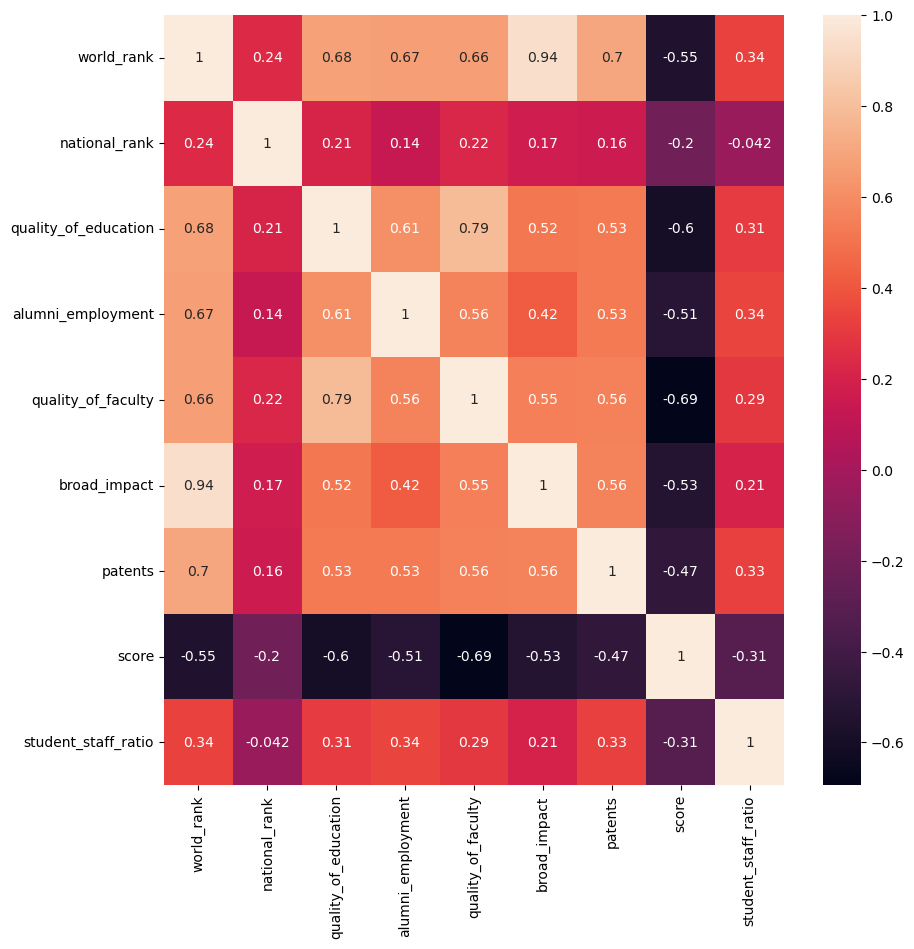

In [14]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

The coefficients in the plot above reflect the degree of linear correlation that exists between each pair of variables. 
A coefficient of 1 means a direct correlation. A coefficient of 0 means no correlation. 
When a coefficient is closer to 1, the correlation is stronger and more direct. When a coefficient is closer to 0, the correlation is weaker.
A positive coefficient means that the two variables correlate positively. A negative coefficient means they correlate inversely.

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


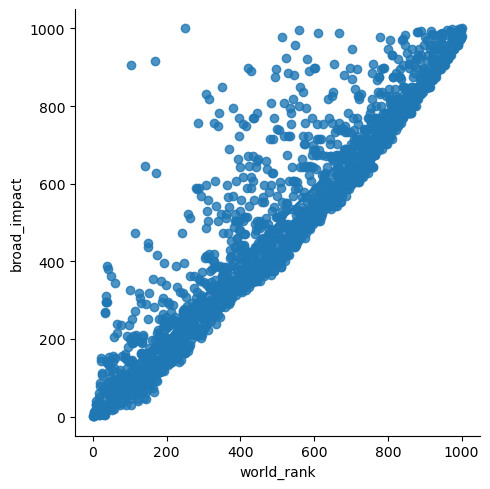

In [15]:
# Create a scatterplot from the variables with the highest coefficient

sns.lmplot(x = 'world_rank', y = 'broad_impact', data = ratings_merged)

The highest ranked universities have the highest rankings for the category of "broad impact". There is a close to perfectly linear positive correlation as the ranks of both categories drop. The universities which fall below the trendline (those who have a higher broad impact than expected) are densely packed. The universities that have a less broad impact than expected consist of more outliers.

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

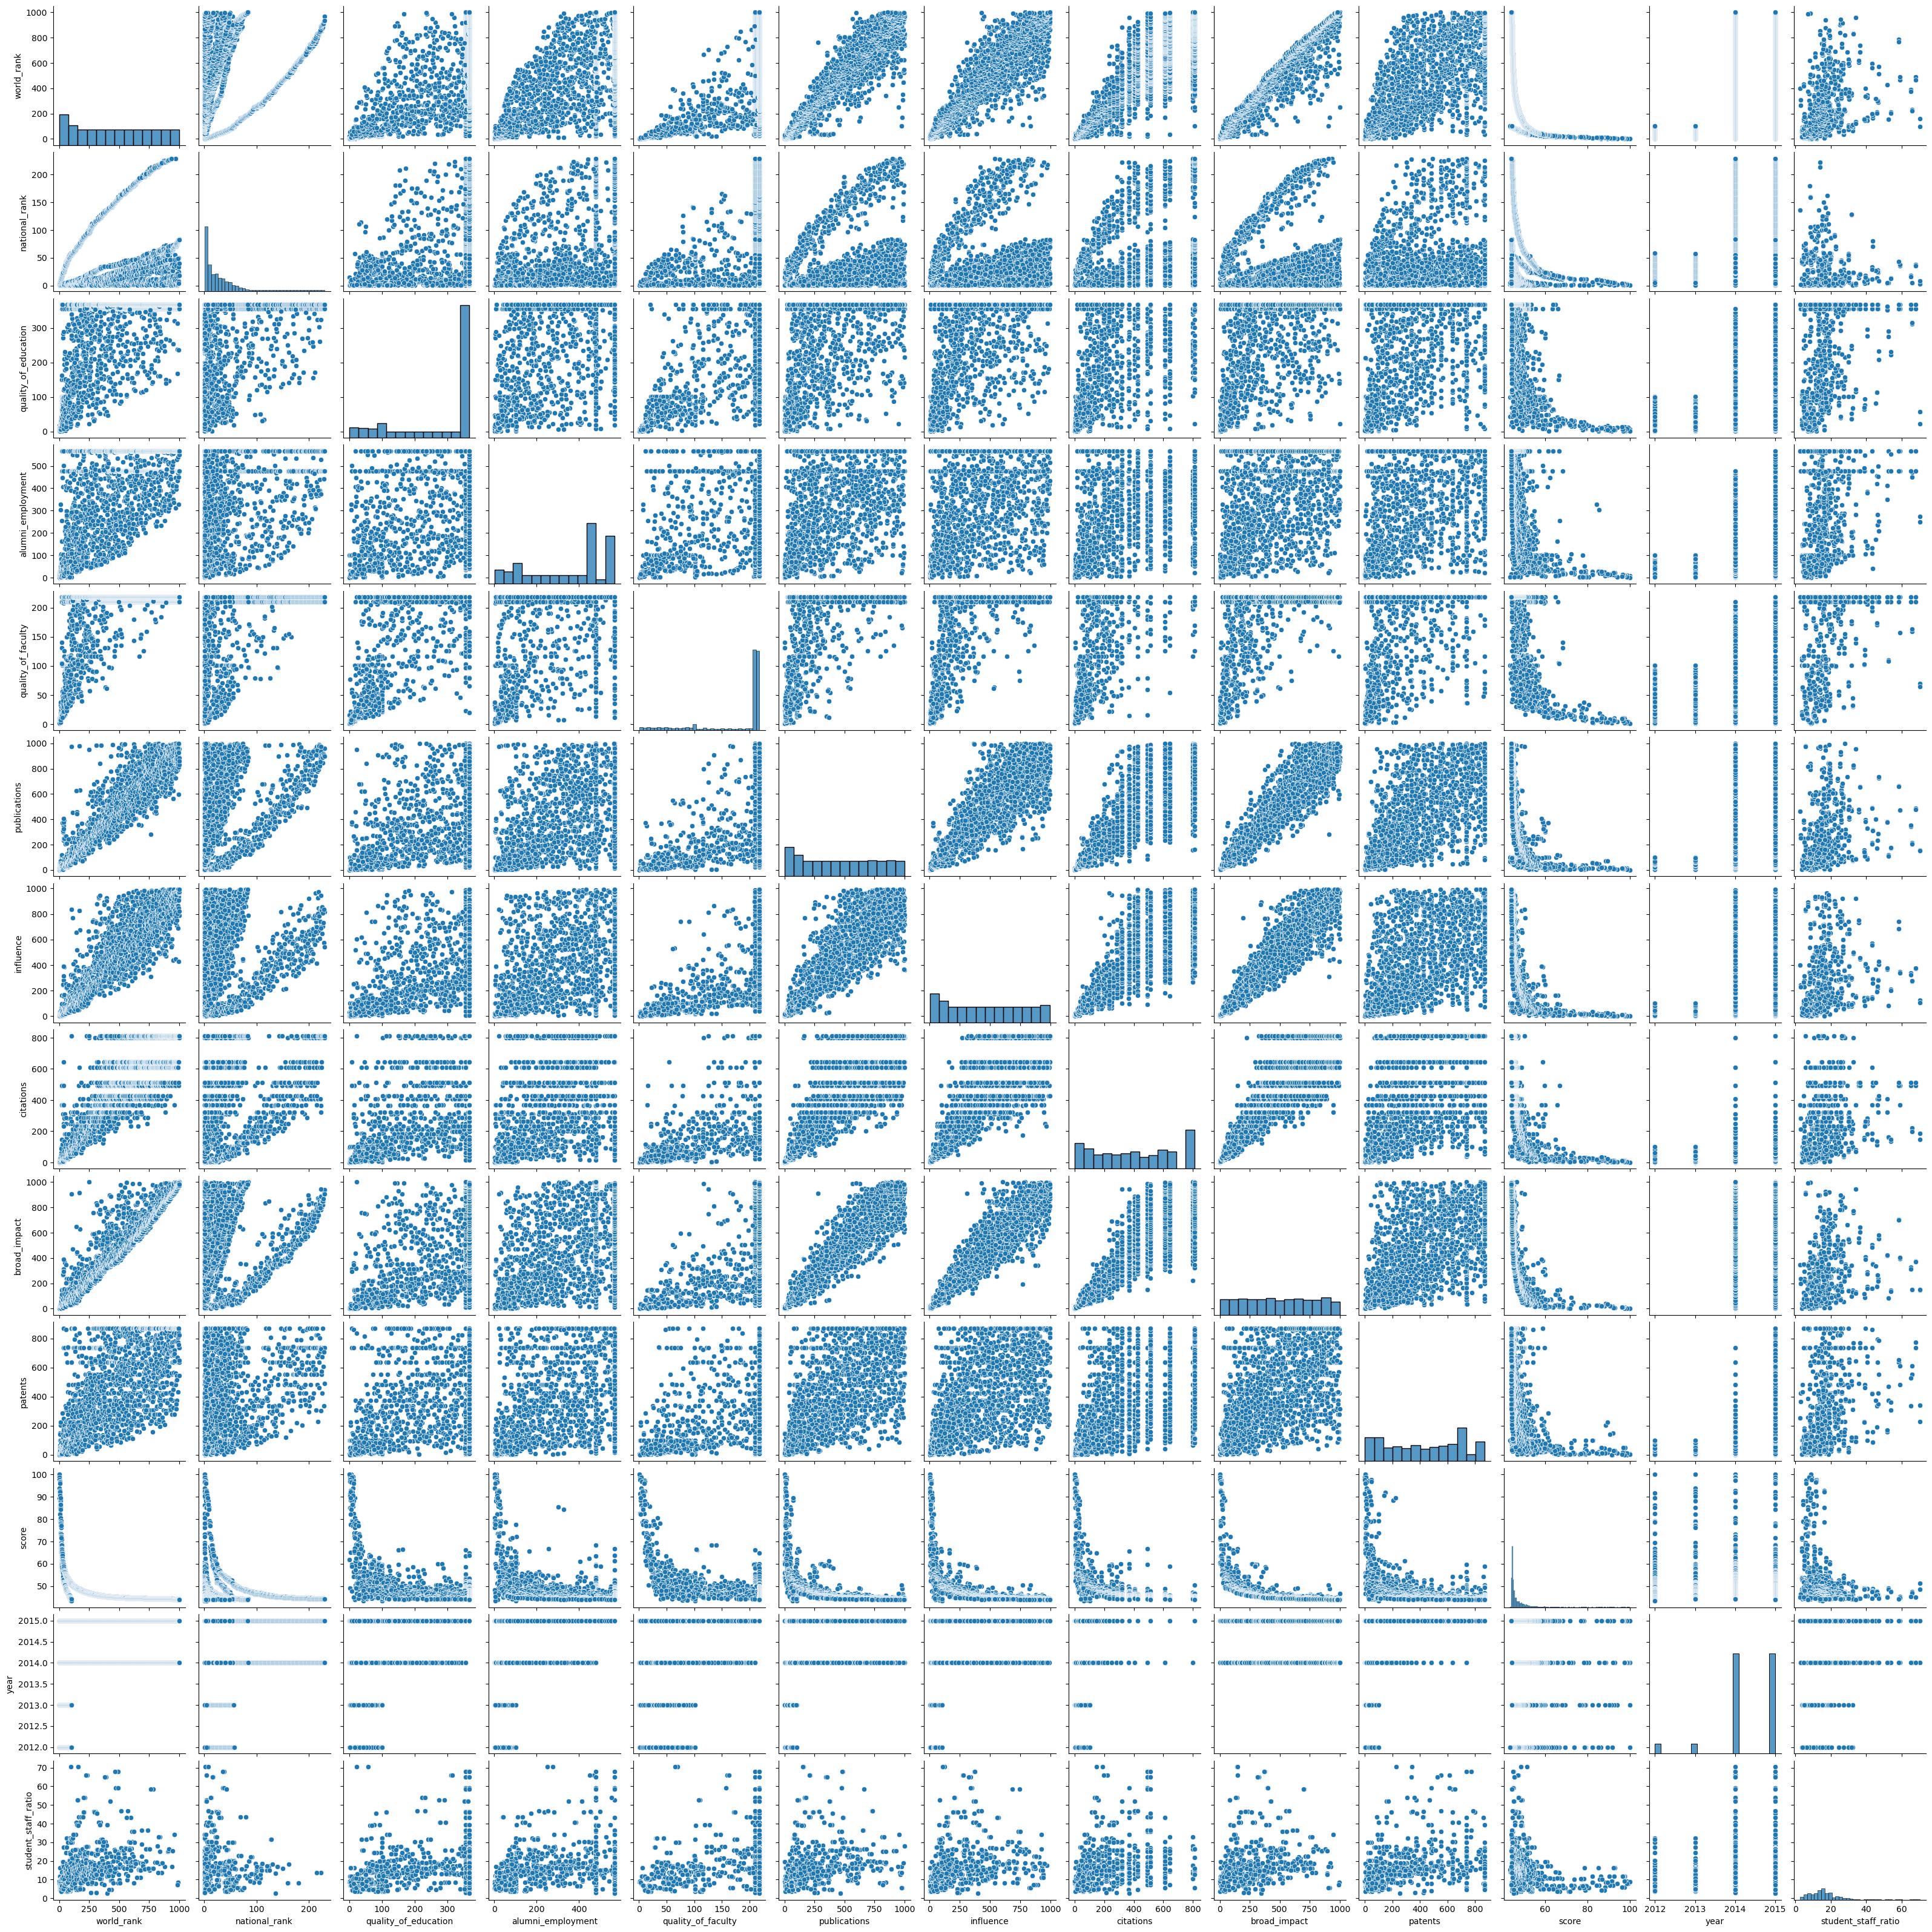

In [16]:
pplot = sns.pairplot(ratings_merged)

The frequency of national ranks are skewed much more to the front compared to world ranks, as expected. 
There are a very high number of schools in the lowest bin for the quality of education ranks and quality of faculty ranks.
In the alumni employment category, there is relatively high frequency amongst the highest ranks and the lowest ranks.

Variables to explore:

Broad impact - The scatterplot with national rank is potentially interest as there are two clusters.

student staff ratio - There are a few different shapes amongst the comparisons with different variables.

Score - The intersection with world_rank seems to have two clusters of points.

Citations - There are clusters of points comprising of narrow bands at specific ranks of citation.

Quality of education, quality of faculty, alumni employment - clear bands juxtaposed to a primary linear cluster


C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='score', ylabel='Count'>

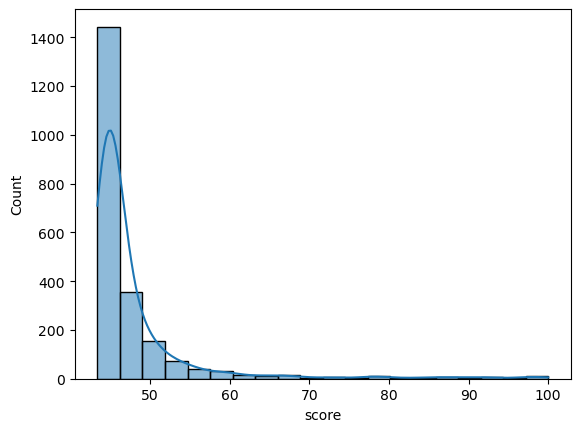

In [17]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(ratings_merged['score'], bins = 20, kde = True)

In [18]:
ratings_merged.loc[ratings_merged['score'] <= 50 , 'Score category'] = 'Low score'

C:\Users\Lawrence\AppData\Local\Temp\ipykernel_5320\2024433618.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low score' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ratings_merged.loc[ratings_merged['score'] <= 50 , 'Score category'] = 'Low score'


In [19]:
ratings_merged.loc[(ratings_merged['score'] > 50) & (ratings_merged['score'] <= 60), 'Score category'] = 'Medium score'

In [20]:
ratings_merged.loc[ratings_merged['score'] > 60, 'Score category'] = 'High score'

In [21]:
ratings_merged['Score category'].value_counts(dropna = False)

Score category
Low score       1868
Medium score     225
High score       107
Name: count, dtype: int64

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

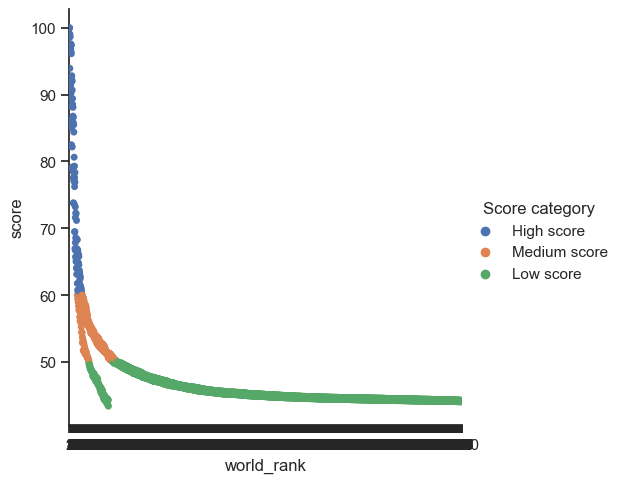

In [22]:
# Create a categorical plot in seaborn using the score categories created above

sns.set(style="ticks")
c_plot = sns.catplot(x="world_rank", y="score", hue="Score category", data=ratings_merged)

The highest ranked schools in the world all have generally high scores. The lowest ranked schools in the world all have low scores. However, there is a tier of ranks below the highest which have a mix of medium scores and low scores.

## Questions to Explore

**Clarifying questions**

•	What factors correlate with universities having a high rank in broad impact?

    World rank has a close to perfect positive correlation (0.92). Ranks in quality of education, alumni employment, quality of faculty, and patents also have a moderately high positive correlation.

•	What factors correlate with universities having a high rank in alumni employment?

    World rank, ranks in quality of education, quality of faculty, and patents all have a moderately high positive correlation. Broad impact and student staff ratio have a weak positive correlation. 

•	What correlations does the student staff ratio have?

    Student staff ratio has practically no correlation with national rank. It has a weak negative correlation with score. It has a weak positive correlation with the other variables.

•	Where are the universities with the highest scores located?

**Adjoining questions**

•	How do alumni employment ranks in one country compare to those in another county?

•	Do university scores change significantly over time?

•	Is there a shift in qualitative factors that correlate with broad impact ranks change over time?

**Funneling questions**

•	Do alumni employment ranks of universities with a low student staff ratio tend to be higher or lower than those of universities with a high student staff ratio?

•	Do scores of universities with a low student staff ratio tend to be higher or lower than those of universities with a high student staff ratio?

•	Do universities with a high national rank but not high world rank tend to lower ranks in quality of education and broad impact than universities with high world rank?

**Elevating questions**

•	How significant of an education difference is there between universities of the high world ranks and the universities of lower world rank but high national rank?

•	Do the highest valued universities necessarily contribute to the broadest impact and greatest research?



**Potential Hypotheses**

Universities in the United States and Europe have highest scores and higher overall world ranks, broad impact ranks, and alumni employment ranks than the rest of the world.

University scores and ranks do not shift significantly over a short period of time.

Universities with a lower student staff ratio have higher scores and alumni employment ranks.

In [23]:
# Export data
ratings_merged.to_pickle(os.path.join(path, '02 Project Datasets', 'Prepared Data', 'uni_ratings.pkl'))